<a href="https://colab.research.google.com/github/DoraemonR/SoYul/blob/main/1%EC%9B%9428%EC%9D%BC_%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1%ED%9A%8C%EA%B7%80%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98%EA%B5%AC%ED%98%84%2B%EA%B8%B0%EB%8A%A5%EC%B6%94%EA%B0%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

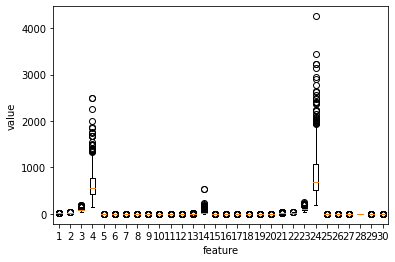

In [ ]:
# box plot 그리기

import matplotlib.pyplot as plt
import numpy as np
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [ ]:
# 4, 14, 24번째 특성 파악
cancer.feature_names[[3,13,23]] # index가 0부터 시작.

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357]))

In [ ]:
x = cancer.data
y = cancer.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=100)
print(x_train.shape, x_test.shape)
np.unique(y_train, return_counts=True)

(455, 30) (114, 30)


(array([0, 1]), array([170, 285]))

In [ ]:
# logistic regression 

class LogisticRegressionNeuron:

  def __init__(self):
    self.w = None
    self.b = None

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # 활성화 함수 구현 : 시그모이드 함수 계산

  def activiation(self, z):
    a = 1 / (1 + np.exp(-z)) 
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      for x_i, y_i in zip(x,y):
        z = self.forpass(x_i)
        a = self.activiation(z)
        err = -(y_i - a)
        w_grad, b_grad = self.backprop(x_i, err)
        self.w -= w_grad
        self.b -= b_grad

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # list comprehension(리스트 내포)
    a = self.activiation(np.array(z))
    return a > 0.5

In [ ]:
neuron = LogisticRegressionNeuron()
neuron.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


In [ ]:
print(neuron.predict(x_test) == y_test)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True  True False  True  True
  True  True  True False  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True  True
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


In [ ]:
np.mean(neuron.predict(x_test) == y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


0.9210526315789473

In [ ]:
# logistic regression 

class SingleLayer:

  def __init__(self):
    self.w = None
    self.b = None
    self.losses = []

  def forpass(self, x):
    z = np.sum(x * self.w) + self.b
    return z

  def backprop(self, x, err):
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad

  # 활성화 함수 구현 : 시그모이드 함수 계산

  def activiation(self, z):
    a = 1 / (1 + np.exp(-z)) 
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))
      for i in indexes :
        z = self.forpass(x[i])
        a = self.activiation(z)
        a = np.clip(a, 1e-10, 1-1e-10)
        err = -(y[i] - a)
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad
        self.b -= b_grad

        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
      self.losses.append(loss/len(y))

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x] # list comprehension(리스트 내포)
    return np.array(z) > 0

  def score(self, x, y):
    return np.mean(self.predict(x)== y)

In [ ]:
layer = SingleLayer()
layer.fit(x_train, y_train)
layer.score(x_test, y_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in exp


0.9210526315789473

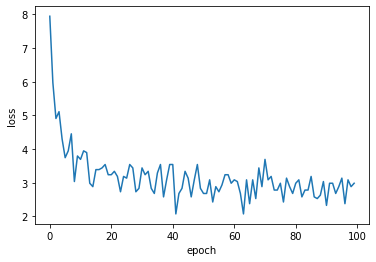

In [ ]:
plt.plot(layer.losses)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
# 사이킷런으로 로지스틱 회귀 구현

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(loss = 'log', max_iter=100, tol = 1e-3, random_state=100)
sgd.fit(x_train, y_train)
sgd.score(x_test, y_test)

0.9122807017543859